#Question1- Classification


---
> Importing Required Packages









In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import tensorflow
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D,BatchNormalization


---
> Loading Datasets






In [2]:
from keras.datasets import cifar10
(X_train,Y_train) , (X_test,Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


---

> Determining Labels






In [3]:
cifar10_labels = ["airplane",
                 "automobile",
                 "bird",
                 "cat",
                 "deer",
                 "dog",
                 "frog",
                 "horse",
                 "ship",
                 "truck"]

---
> Ploting 10 random images









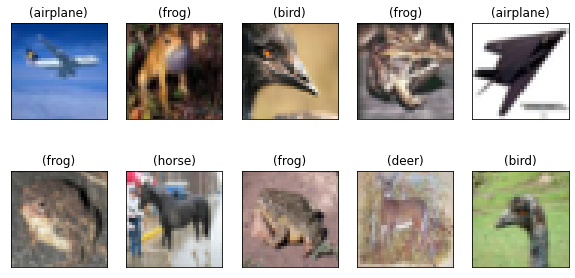

In [4]:
figure = plt.figure(figsize=(10, 5))
for i, index in enumerate(np.random.choice(X_train.shape[0], size = 10, replace = False)):
    img = figure.add_subplot(2, 5, i + 1, xticks = [], yticks = [])
    # Displaying each image
    img.imshow(np.squeeze(X_train[index]))
    true_index = (Y_train[index])[0]
    # Setting the title for each image
    img.set_title("({})".format(cifar10_labels[true_index]))


---
> Data Preproccesing


In [5]:
# Data_Normalization
x_train = X_train.astype('float32') / 255
x_test = X_test.astype('float32') / 255

# # Converting RGB to Grayscale
# x_train = np.mean(x_train, axis=3)
# x_test= np.mean(x_test, axis=3)

# Changing Size
# x_train = x_train.reshape(-1,32*32)
# x_test = x_test.reshape(-1,32*32)

---

> Plotting a grayscale image



In [6]:
# plt.subplot(1, 2, 1)
# plt.imshow(X_train[12])
# plt.title('(RGB)')
# plt.subplot(1, 2, 2)
# plt.imshow(x_train[12].reshape(32,32), cmap = 'gray')
# plt.title('(grayscale)')

---
> Defining Validation Data




In [7]:
Y_train.shape

(50000, 1)

In [8]:
(x_train,x_valid) = x_train[10000:],x_train[:10000]
(Y_train,Y_valid) = Y_train[10000:],Y_train[:10000]

---


> One-Hot-Encoding



In [9]:
y_train = keras.utils.to_categorical(Y_train,10)
y_valid = keras.utils.to_categorical(Y_valid,10)
y_test = keras.utils.to_categorical(Y_test,10)

---


> Creating Model



In [49]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=[32,32,3]))
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=[32,32,3]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 6400)              0         
                                                                 
 dense_15 (Dense)            (None, 512)              

---


> Compiling Model



In [62]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
callback =keras.callbacks.EarlyStopping(monitor='val_loss' , patience=3,restore_best_weights=True)


---


> Training Model



In [67]:
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size = 32, epochs = 10,verbose=1, validation_data=(x_valid,y_valid), callbacks=[callback])
end = datetime.datetime.now()

Epoch 1/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.0642 - accuracy: 0.9815 - val_loss: 1.7791 - val_accuracy: 0.7081
Epoch 2/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.0614 - accuracy: 0.9815 - val_loss: 1.8984 - val_accuracy: 0.7001
Epoch 3/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.0568 - accuracy: 0.9823 - val_loss: 2.1918 - val_accuracy: 0.6880
Epoch 4/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.0601 - accuracy: 0.9824 - val_loss: 1.8518 - val_accuracy: 0.7030


---
>Traning Time

In [68]:
Training_Time = end - start
print ('Training_Time:', Training_Time)

Training_Time: 0:00:59.217401


---


> Plotting Loss & Accuracy Curves



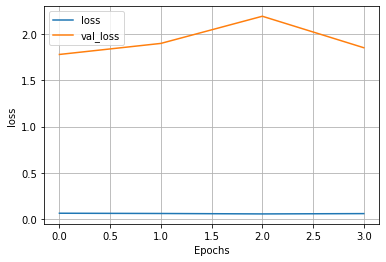

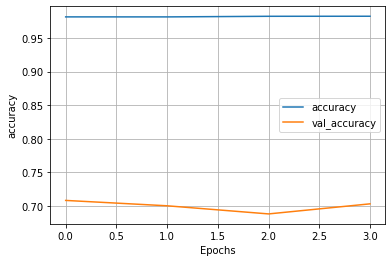

In [69]:
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.grid()
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['accuracy','val_accuracy'])
plt.grid()

---


> Test_Loss & Test_Accuracy



In [70]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test_loss:', test_loss)
print('Test_accuracy:', test_accuracy)

Test_loss: 1.8081917762756348
Test_accuracy: 0.7038000226020813


---


> Predicting 10 Random Test Data



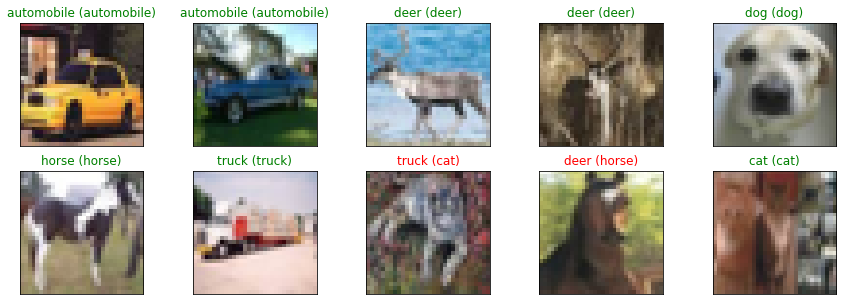

In [71]:
y_pred = model.predict(x_test)
figure = plt.figure(figsize=(15, 5))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_pred[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(cifar10_labels[predict_index], 
                                  cifar10_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))